In [6]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import Planck15 as cosmo
from astropy import units as u
import xcorr
from twentyonecmFAST import load_binary_data
from powerbox.powerbox import get_power

In [2]:
def P_2D(P, mu, z):
    """asdf
    """
    beta = cosmo.Om(z) ** 0.6
    return P * (1. + beta * mu ** 2) ** 2

In [3]:
temp_21 = load_binary_data('../../data/delta_T_v3_z007.04_nf0.233584_useTs1_256_200Mpc')
temp_21 = np.reshape(temp_21, (256, 256, 256))

In [4]:
z = 7.04
halos = np.loadtxt('../../data/halos_z7.04_768_200Mpc')
halo_pos = (halos[:, 1:] * 256).astype(int)
halo_mass = halos[:, 0]
idx = np.where(halo_pos[:, 2] == 127)[0]

In [5]:
lya_cube = xcorr.cube_brightness(halo_mass, halo_pos, z)

In [6]:
ps, kpar, kperp = get_power(lya_cube / lya_cube.mean() - 1, 200, res_ndim = 2, log_bins = True, bins = 14)
kpar, kperp = np.meshgrid(kpar, kperp)

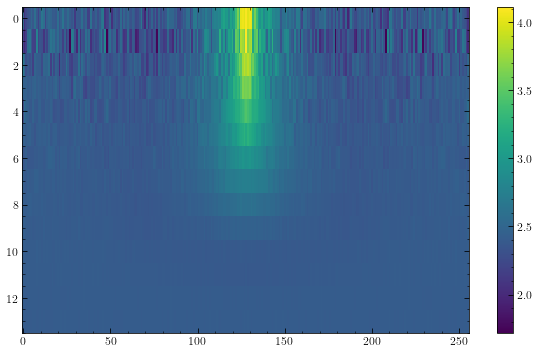

In [7]:
plt.figure(figsize=(10,6))
plt.imshow(np.log10(ps), aspect = 'auto')
plt.colorbar()
plt.show()

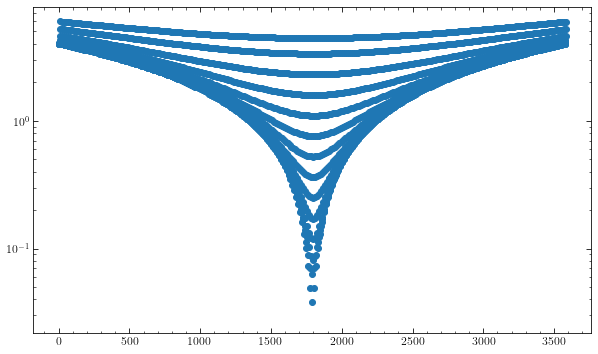

In [8]:
plt.figure(figsize=(10,6))
plt.scatter(np.arange(kpar.size), np.sqrt(kpar ** 2 + kperp ** 2).ravel())
plt.yscale('log')
plt.show()

In [9]:
k_vals = np.sqrt(kpar ** 2 + kperp ** 2)
k_bins = np.logspace(np.log10(k_vals.min()), np.log10(k_vals.max()), 14)
idx = np.digitize(k_vals, k_bins, right = True).T

In [10]:
p_calc = np.zeros((14))

for i in np.arange(14):
    i1, i2 = np.where(idx == i)
    p_calc[i] = np.mean(ps[i1, i2])

(0,)
(3,)
(6,)
(11,)
(25,)
(39,)
(65,)
(111,)
(181,)
(293,)
(473,)
(755,)
(1183,)
(439,)


/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [11]:
ps_true, k_true = xcorr.dimensional_ps(lya_cube, 200, bins = 14, log_bins = True)

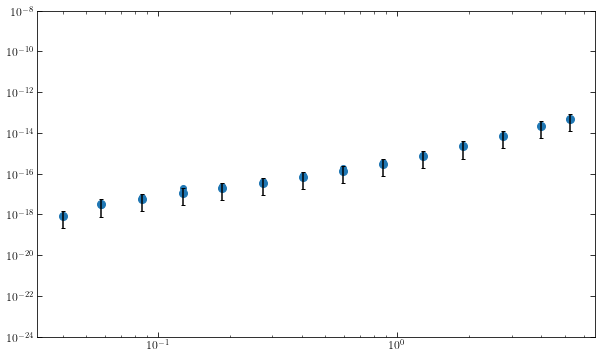

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(k_true, lya_cube.mean() ** 2 * k_true ** 3 * p_calc  / (2 * np.pi ** 2))
plt.errorbar(k_true, ps_true, yerr = ps_true * 0.75, fmt='o', ecolor = 'black', barsabove = True,
             markersize=8, capsize=2)
plt.plot(k_true, ps_true, alpha = 0)
plt.xscale('log')
plt.yscale('log')
plt.ylim([1e-24, 1e-8])
plt.show()

## Survey Volume

In [7]:
z = 7.

In [9]:
((cosmo.comoving_transverse_distance(z) / (u.radian)) ** 2 * (27 * u.degree ** 2)).to(u.Mpc ** 2)

<Quantity 640179.58641315 Mpc2>

In [5]:
cosmo.comoving_transverse_distance

In [16]:
def V_sur(z, A = 400 * u.m ** 2):
    l_21 = (21.1 * u.cm) * (1 + z)
    return (A_sur(z) * survey_depth(z) * (l_21 ** 2.0 / A)).to(u.Mpc ** 3)

def A_sur(z):
    """
    """
    return ((cosmo.comoving_transverse_distance(z) / (u.radian)) ** 2 * (800 * u.degree ** 2)).to(u.Mpc ** 2)


def survey_depth(z, B = 8 * u.MHz):
    """1708.06291.pdf
    """
    return 1.7 * (B / (0.1 * u.MHz)) * ((1 + z) / 10) ** 0.5 * (cosmo.Om(z) * cosmo.h ** 2 / 0.15) ** -2 * u.Mpc

In [17]:
V_sur(z)

<Quantity 1795316.01146236 Mpc3>